In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# read preprocessed data
train_data = pd.read_csv("./Processed_Data/processed_train_data.csv")

In [3]:
train_data.isna().sum()

air_store_id            0
visit_date              0
visitors                0
day_of_week             0
holiday_flg             0
air_genre_name          0
air_area_name           0
latitude                0
longitude               0
reserve_visitors_air    0
reservation_gap         0
reserve_visitors_hpg    0
hpg_reserve_gap         0
dtype: int64

In [4]:
train_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0


In [8]:
train_data.visit_date = pd.to_datetime(train_data.visit_date)

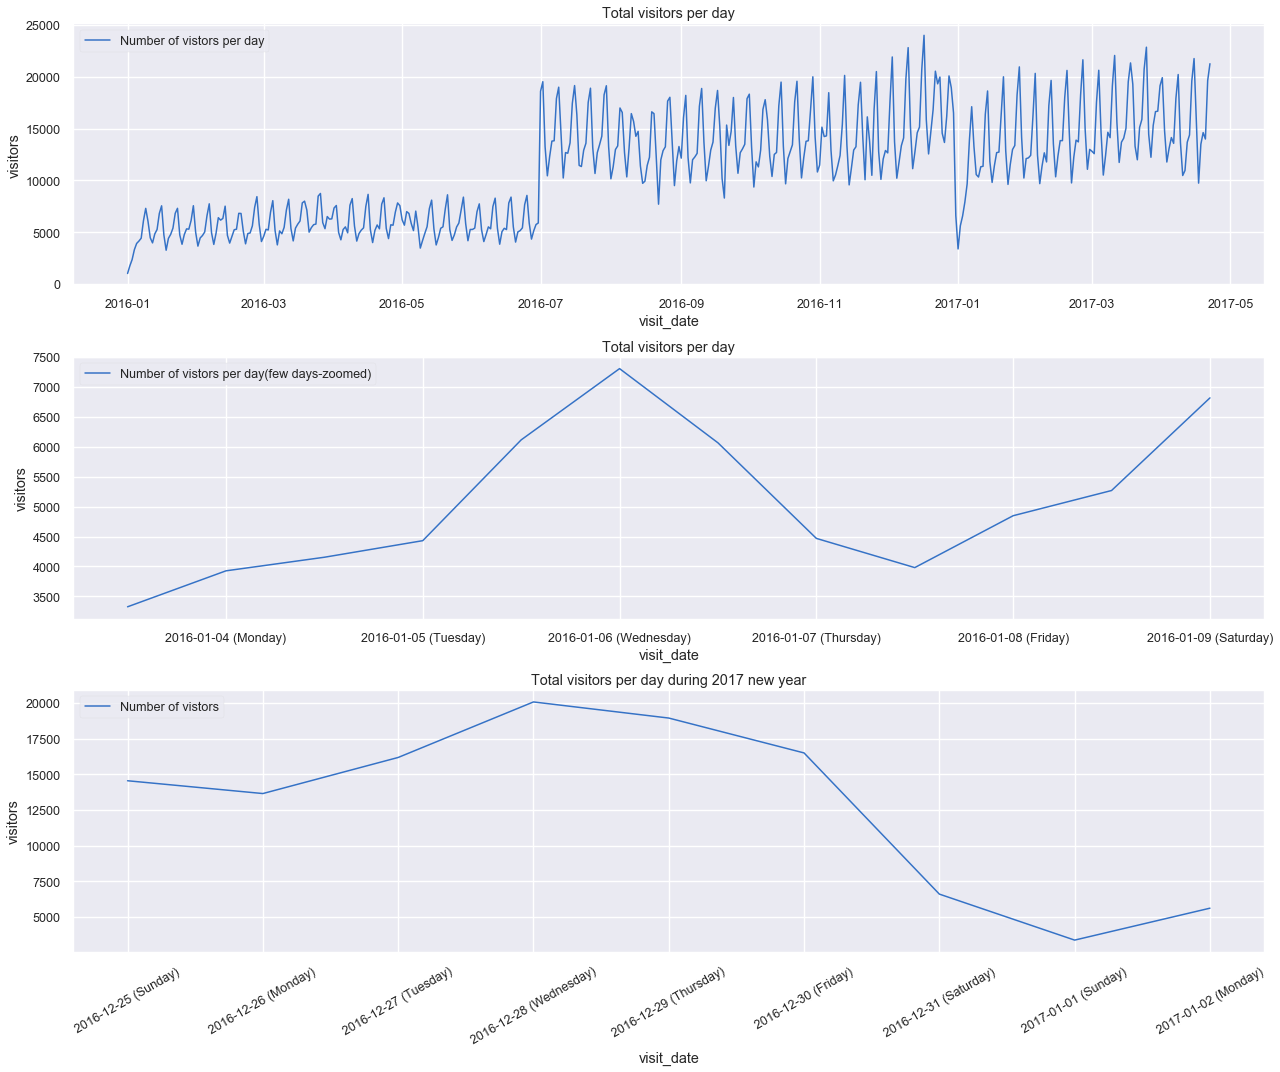

In [99]:
# per day visitors
fig = plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(311)

temp = train_data.groupby("visit_date").visitors.sum()

sns.lineplot(temp.index, temp, ax=ax1, label="Number of vistors per day")
plt.title("Total visitors per day")
plt.legend(loc='upper left')

ax2 = fig.add_subplot(312)
sns.lineplot(temp.index[3:15], temp[3:15], ax=ax2, label="Number of vistors per day(few days-zoomed)")
ax2.set_xticklabels(temp[3:15].index.strftime("%Y-%m-%d (%A)"))
plt.legend(loc='upper left')
plt.title("Total visitors per day")

temp = temp.loc['2016-12-25': '2017-01-02']

ax3 = fig.add_subplot(313)
sns.lineplot(temp.index, temp, ax=ax3, label="Number of vistors")
ax3.set_xticklabels(temp.index.strftime("%Y-%m-%d (%A)"), rotation=30)
plt.title("Total visitors per day during 2017 new year")
plt.legend(loc='upper left')
plt.xticks
plt.tight_layout()
plt.show()

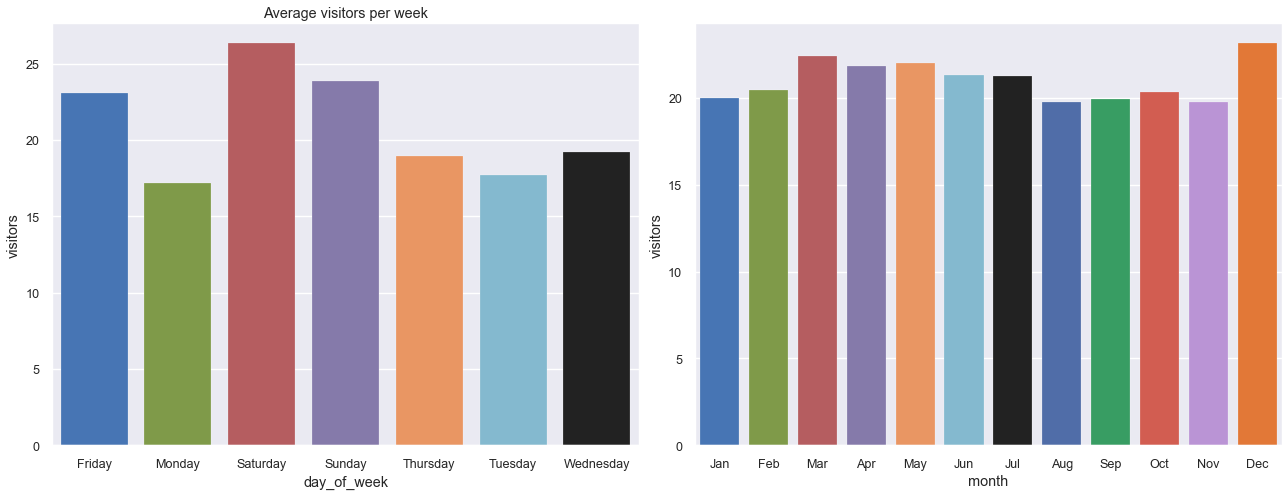

In [60]:
# average per week, per month
fig = plt.figure(figsize=(18,7))

ax1 = fig.add_subplot(121)

temp = train_data.groupby("day_of_week").visitors.mean()

sns.barplot(temp.index, temp, ax=ax1)

plt.title("Average visitors per week")

train_data['month'] = train_data.visit_date.dt.month
temp = train_data.groupby("month",).visitors.mean()

ax2 = fig.add_subplot(122)
sns.barplot(temp.index, temp, ax=ax2, label="Average of vistors per month")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_labels = [ months[i-1] for i in temp.index]
ax2.set_xticklabels(x_labels)
plt.tight_layout()
plt.show()

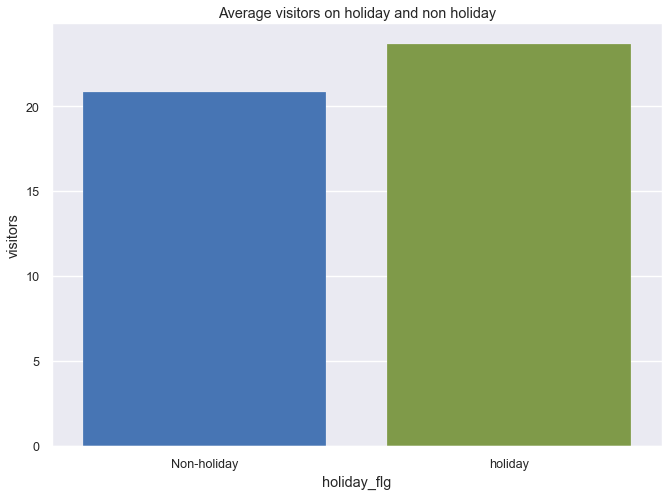

In [62]:
# average vistors on holiday and non holiday
fig = plt.figure(figsize=(18,7))

ax1 = fig.add_subplot(121)

temp = train_data.groupby("holiday_flg").visitors.mean()

sns.barplot(temp.index, temp, ax=ax1)
labels = ['Non-holiday', 'holiday']
ax1.set_xticklabels([labels[i] for i in temp.index])
plt.title("Average visitors on holiday and non holiday")

plt.tight_layout()
plt.show()

In [112]:
# add if next day is holiday as feature
train_data['next_day_holiday'] = train_data.day_of_week.isin(['Friday','Saturday']).astype(int)


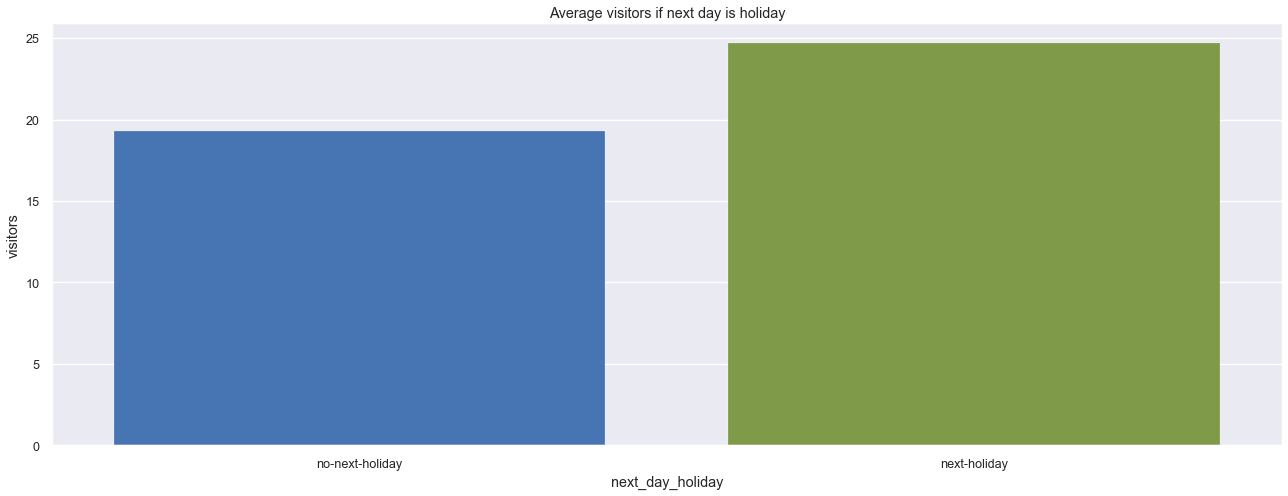

In [114]:
# average vistors if next day is holiday
fig = plt.figure(figsize=(18,7))

ax1 = fig.add_subplot(111)

temp = train_data.groupby("next_day_holiday").visitors.mean()

sns.barplot(temp.index, temp, ax=ax1)
labels = ['no-next-holiday', 'next-holiday']
ax1.set_xticklabels([labels[i] for i in temp.index])
plt.title("Average visitors if next day is holiday")

plt.tight_layout()
plt.show()


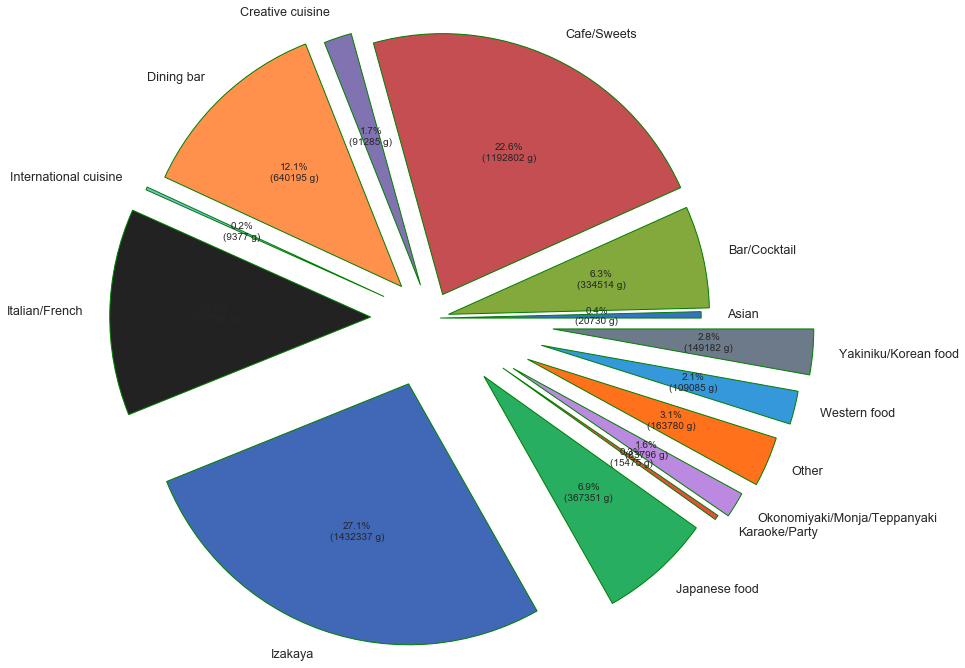

In [144]:
# which genre of restaurant are popular among visitor
#fig = plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

temp = train_data.groupby('air_genre_name').visitors.sum()
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

# Creating explode data 
explode = [i/10 for i in range(1, 15)]

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 


plt.pie(temp, labels=temp.index, radius=3, wedgeprops=wp, autopct = lambda pct: func(pct, temp), explode=explode)

plt.show()


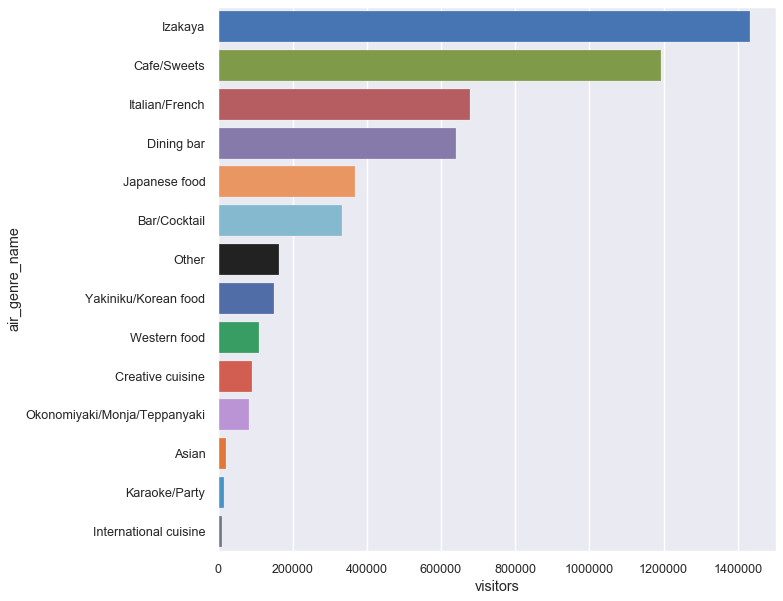

In [152]:
fig, ax = plt.subplots(figsize=(10,10))

temp.sort_values(inplace=True, ascending=False)
sns.barplot(orient='h', x=temp, y=temp.index, ax=ax)

plt.show()

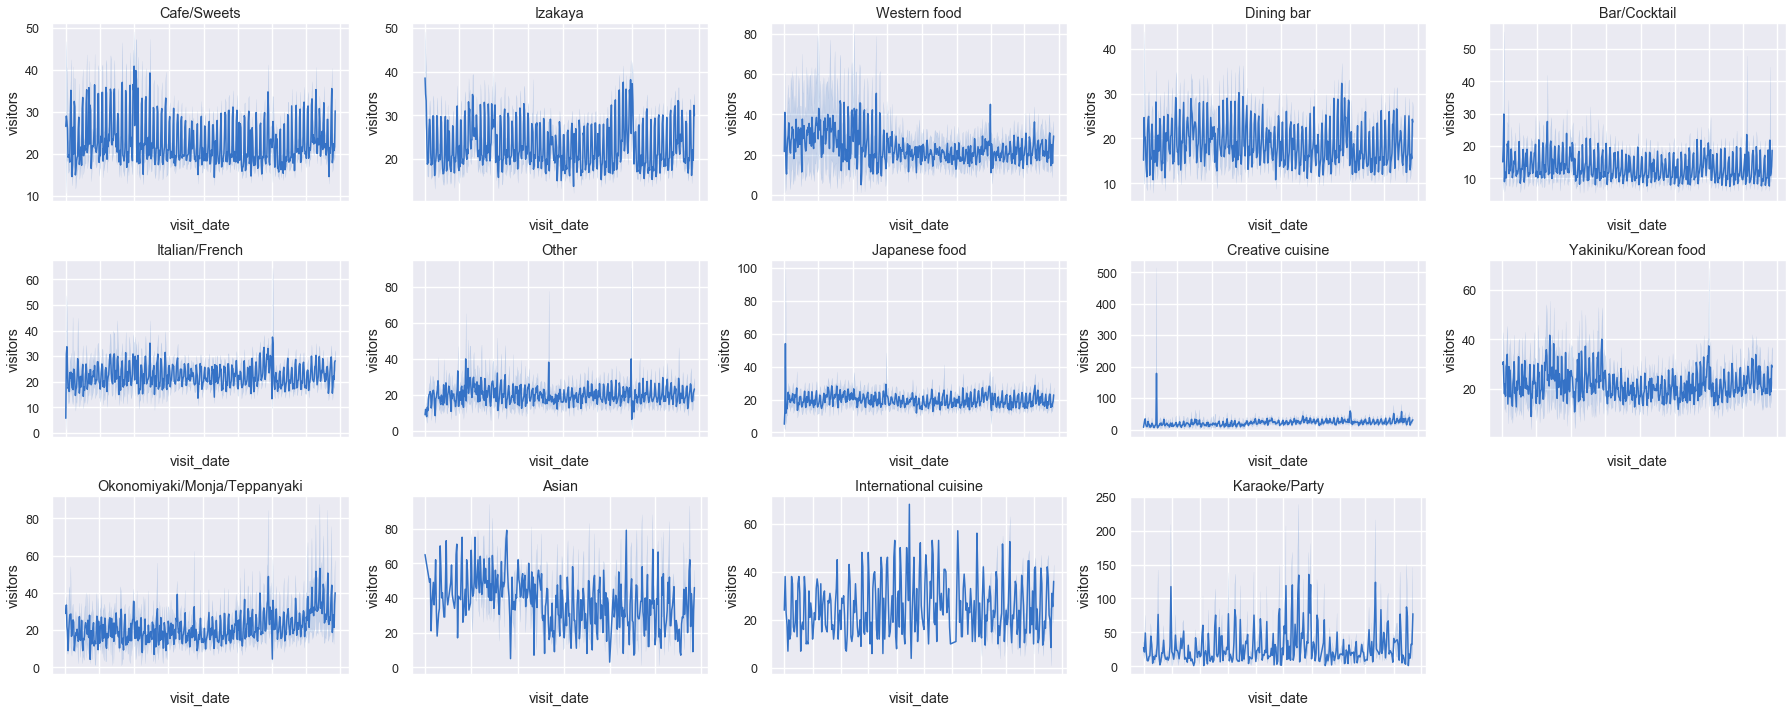

In [41]:
# visitors trend accross each genre
genres = train_data.air_genre_name.unique()


fig = plt.figure(figsize=(25, 10))

gs = fig.add_gridspec(3,5)


for j in range(3):
    for i in range(5):
        
        if j == 1:
            genre_i = 5
        elif j == 2:
            genre_i = 10
            if genre_i + i > 13:
                break
        else:
            genre_i = 0
        
        temp = train_data[train_data.air_genre_name == genres[genre_i + i]][['visit_date','visitors']]

        ax = fig.add_subplot(gs[j,i])

        g = sns.lineplot(temp.visit_date, temp.visitors, ax=ax, )
        g.set_xticklabels(labels=[])
        plt.title(genres[genre_i + i])
    
plt.xlabel("visit_date")
plt.ylabel("visitors")
plt.tight_layout()
plt.show()

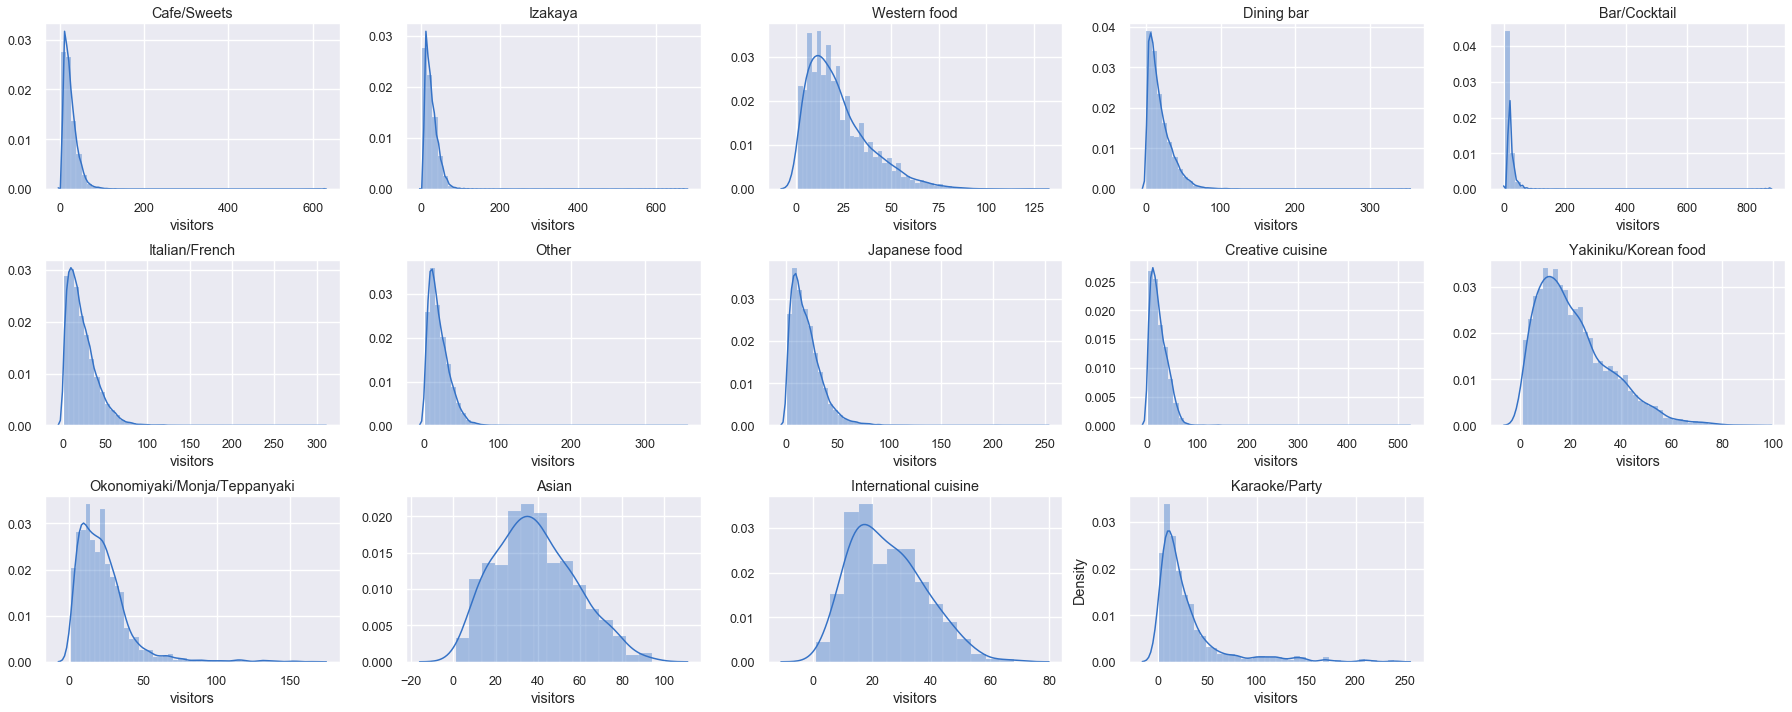

In [43]:
# visitors trend accross each genre
genres = train_data.air_genre_name.unique()


fig = plt.figure(figsize=(25, 10))

gs = fig.add_gridspec(3,5)


for j in range(3):
    for i in range(5):
        
        if j == 1:
            genre_i = 5
        elif j == 2:
            genre_i = 10
            if genre_i + i > 13:
                break
        else:
            genre_i = 0
        
        temp = train_data[train_data.air_genre_name == genres[genre_i + i]]['visitors']

        ax = fig.add_subplot(gs[j,i])
        
        sns.distplot(temp, ax=ax)
        plt.title(genres[genre_i + i])
    
plt.xlabel("visitors")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [33]:
# check area wise how many restaurants are there
temp = train_data.groupby("air_area_name", as_index=False).air_store_id.count()
train_data = pd.merge(train_data, temp, how='left', on='air_area_name')
train_data.rename(columns={'air_store_id_y': 'area_store_count', 'air_store_id_x':'air_store_id'}, inplace=True)


# check area wise how many same genre restaurants are there
temp = train_data.groupby(["air_area_name",'air_genre_name'], as_index=False).air_store_id.count()
train_data = pd.merge(train_data, temp, how='left', on=['air_area_name', 'air_genre_name'])
train_data.rename(columns={'air_store_id_y': 'area_genre_store_count', 'air_store_id_x':'air_store_id' }, inplace=True)

train_data.head()
# fig, ax = plt.subplots(figsize=(10,10))



# temp
# # sns.barplot(orient='h', x=temp, y=temp.index, ax=ax)

# # plt.show()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,area_store_count,area_genre_store_count
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0,2015,1477
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0,12517,2821
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0,695,695
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0,1419,936
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0,6882,1093


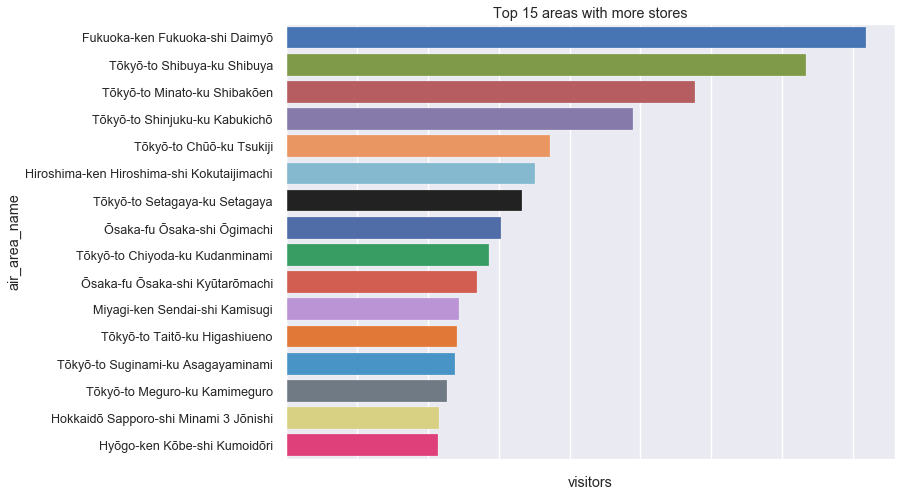

In [72]:
# if more stores then more visitors?

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(121)

temp = train_data.groupby('air_area_name').visitors.sum()
temp.sort_values(ascending=False, inplace=True)

g = sns.barplot(temp[:16], temp.index[:16], orient='h')
ax.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Top 15 areas with more stores")
plt.show()

In [66]:
# import chart_studio.plotly as py 
# import plotly.graph_objs as go #importing graphical objects
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.express as px

# fig = px.scatter_mapbox(train_data, lat="latitude", lon="longitude", zoom=5, )
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":150,"t":50,"l":125,"b":30})
# fig.show()

In [7]:
train_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0


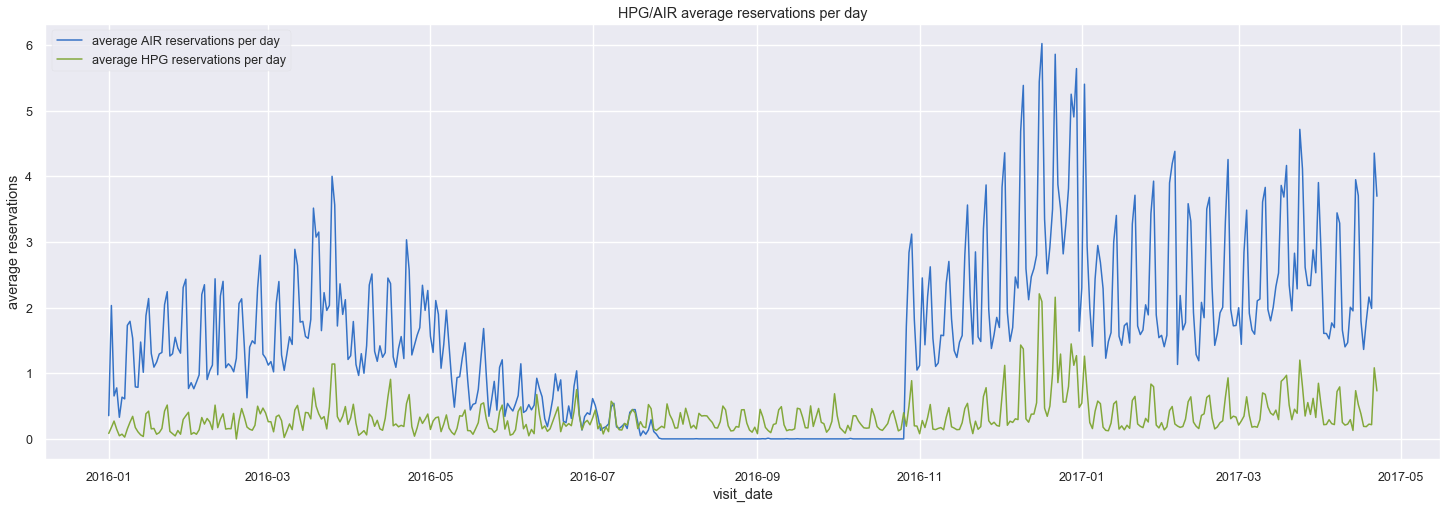

In [12]:
# reservations
train_data.visit_date = pd.to_datetime(train_data.visit_date)
# average reservations per day
temp = train_data.groupby("visit_date").reserve_visitors_air.mean()
temp2 = train_data.groupby("visit_date").reserve_visitors_hpg.mean()


fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(111)

sns.lineplot(temp.index, temp, label="average AIR reservations per day", ax=ax)
sns.lineplot(temp2.index, temp2, label="average HPG reservations per day", ax=ax)
plt.legend(loc='upper left')
plt.ylabel("average reservations")

plt.title("HPG/AIR average reservations per day")
plt.show()

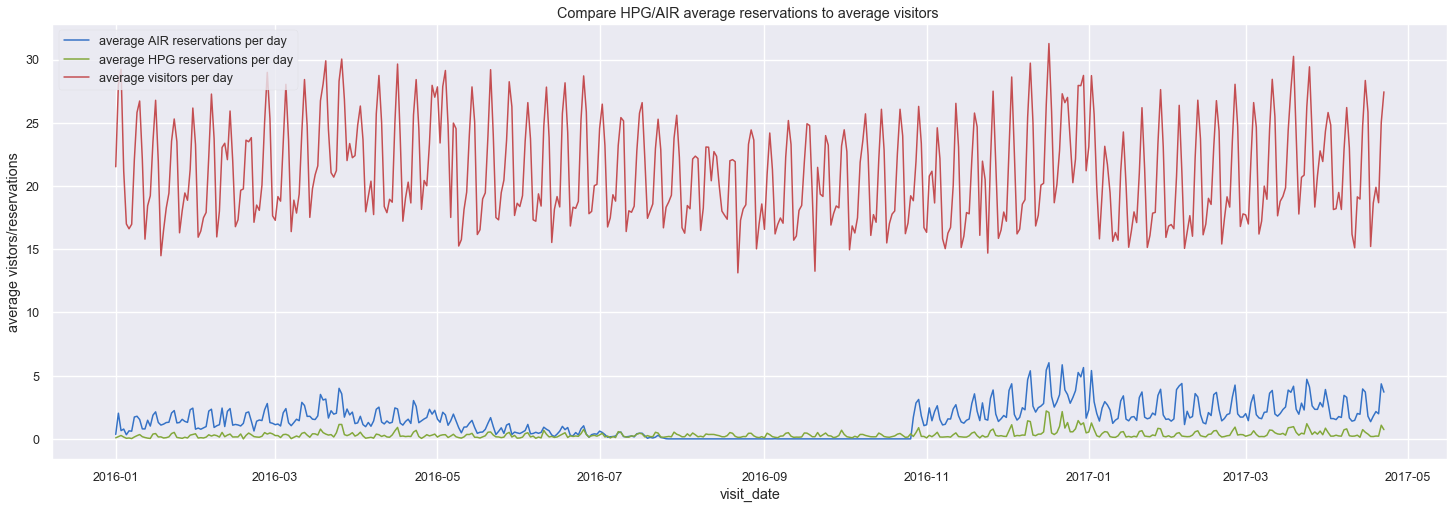

In [15]:
# whether reservations follow the visitor trend?
# reservations

train_data.visit_date = pd.to_datetime(train_data.visit_date)
# average reservations per day
temp = train_data.groupby("visit_date").reserve_visitors_air.mean()
temp2 = train_data.groupby("visit_date").reserve_visitors_hpg.mean()
temp3 = train_data.groupby("visit_date").visitors.mean()


fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(111)

sns.lineplot(temp.index, temp, label="average AIR reservations per day", ax=ax)
sns.lineplot(temp2.index, temp2, label="average HPG reservations per day", ax=ax)
sns.lineplot(temp3.index, temp3, label="average visitors per day", ax=ax)
plt.legend(loc='upper left')
plt.ylabel("average vistors/reservations")

plt.title("Compare HPG/AIR average reservations to average visitors ")
plt.show()

In [16]:
# encode reseravtion gap
# 1 = 0 - 24 hrs
# 2 = 25 - 48 hrs
# 3 = 49 - 72 hrs
# 4 = 72 - 96 hrs
# 5 = 96+ hrs

def encode_reserve_gap(hrs):
    
    if hrs >=0 and hrs <=24:
        return 1
    elif hrs >=25 and hrs <=48:
        return 2
    elif hrs >=49 and hrs <=72:
        return 3
    elif hrs >=73 and hrs <=96:
        return 4
    else:
        return 5
    

train_data['air_reserve_gap_encode'] = train_data.reservation_gap.apply(lambda x: encode_reserve_gap(x))
train_data['hpg_reserve_gap_encode'] = train_data.hpg_reserve_gap.apply(lambda x: encode_reserve_gap(x))

In [17]:
train_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,air_reserve_gap_encode,hpg_reserve_gap_encode
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0,1,1
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0,1,1
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0,1,1
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0,1,1
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0,1,1


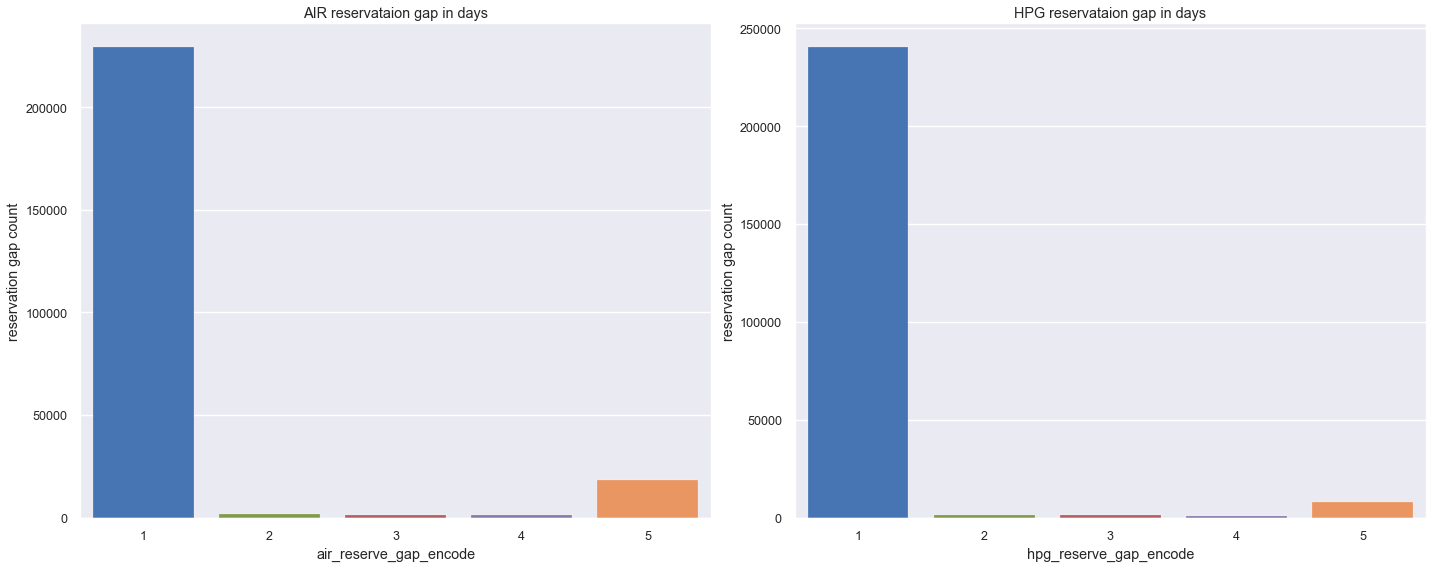

In [27]:
# reseravtion gap in restaurant

# average reservations per day
temp = train_data.groupby("air_reserve_gap_encode").air_store_id.count()
temp2 = train_data.groupby("hpg_reserve_gap_encode").air_store_id.count()

temp2.head()



fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121)

sns.barplot(temp.index, temp, ax=ax)
plt.ylabel("reservation gap count")
plt.title("AIR reservataion gap in days")

ax2 = fig.add_subplot(122)
sns.barplot(temp2.index, temp2, ax=ax2)

#plt.legend(loc='upper left')
plt.ylabel("reservation gap count")

plt.title("HPG reservataion gap in days")
plt.tight_layout()
plt.show()

In [28]:
train_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,air_reserve_gap_encode,hpg_reserve_gap_encode
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0,1,1
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0,1,1
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0,1,1
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0,1,1
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0,1,1


* visitors variable has seasonality in it. if you 

In [32]:
# train_data.rename(columns={'air_store_id_x': 'air_store_id'}, inplace=True)
# train_data.drop('area_store_count', axis=1, inplace=True)
train_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0


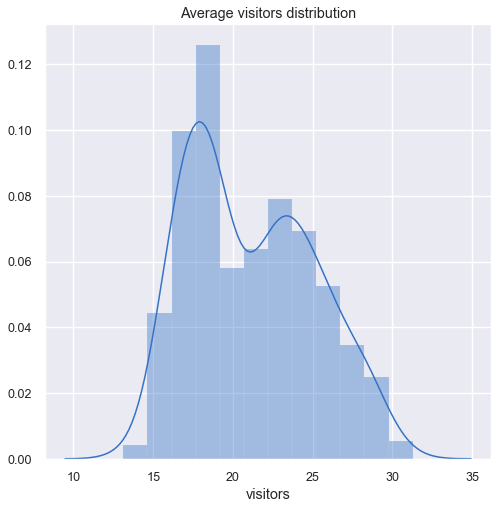

In [16]:
# what is average visitors distribution
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.distplot(train_data.groupby('visit_date').visitors.mean(), ax=ax)
plt.title("Average visitors distribution")
plt.show()

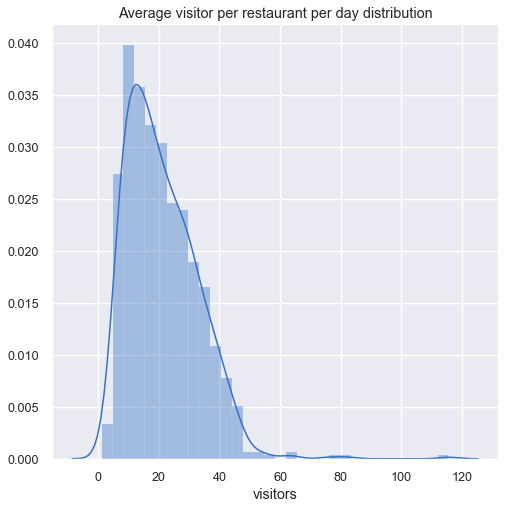

In [20]:
# average visitors per restarant
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.distplot(train_data.groupby(['air_store_id']).visitors.mean(), ax=ax)
plt.title("Average visitor per restaurant distribution")
plt.show()

In [19]:
train_data.groupby(['air_store_id', 'visit_date']).

visitors  holiday_flg   latitude   longitude  \
air_store_id         visit_date                                                 
air_00a91d42b08b08d9 2016-07-01        35            0  35.694003  139.753595   
                     2016-07-02         9            0  35.694003  139.753595   
                     2016-07-04        20            0  35.694003  139.753595   
                     2016-07-05        25            0  35.694003  139.753595   
                     2016-07-06        29            0  35.694003  139.753595   
...                                   ...          ...        ...         ...   
air_fff68b929994bfbd 2017-04-18         6            0  35.708146  139.666288   
                     2017-04-19         2            0  35.708146  139.666288   
                     2017-04-20         2            0  35.708146  139.666288   
                     2017-04-21         4            0  35.708146  139.666288   
                     2017-04-22         5            0  35.708146  139.666288   

                                 reserve_visitors_air  reservation_gap  \
air_store_id         visit_date                                          
air_00a91d42b08b08d9 2016-07-01                   0.0              0.0   
                     2016-07-02                   0.0              0.0   
                     2016-07-04                   0.0              0.0   
                     2016-07-05                   0.0              0.0   
                     2016-07-06                   0.0              0.0   
...                                               ...              ...   
air_fff68b929994bfbd 2017-04-18                   0.0              0.0   
                     2017-04-19                   0.0              0.0   
                     2017-04-20                   0.0              0.0   
                     2017-04-21                   0.0              0.0   
                     2017-04-22                   0.0              0.0   

                                 reserve_visitors_hpg  hpg_reserve_gap  
air_store_id         visit_date                                         
air_00a91d42b08b08d9 2016-07-01                   1.0             29.0  
                     2016-07-02                   0.0              0.0  
                     2016-07-04                   0.0              0.0  
                     2016-07-05                   0.0              0.0  
                     2016-07-06                   7.0            278.0  
...                                               ...              ...  
air_fff68b929994bfbd 2017-04-18                   0.0              0.0  
                     2017-04-19                   0.0              0.0  
                     2017-04-20                   0.0              0.0  
                     2017-04-21                   0.0              0.0  
                     2017-04-22                   0.0              0.0  

[252108 rows x 8 columns]

In [38]:
train_data.visit_date = pd.to_datetime(train_data.visit_date)

In [10]:
# Univariate Analysis

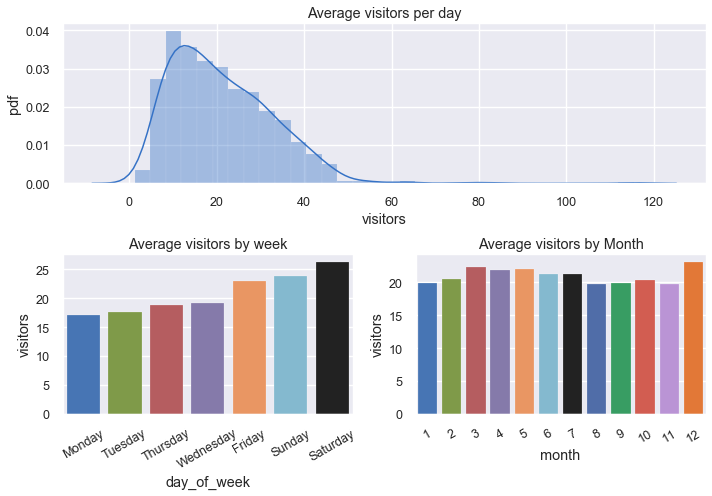

In [53]:
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,:])
sns.distplot(train_data.groupby("air_store_id").visitors.mean(), ax=ax1).set_title("Average visitors per day")
plt.ylabel("pdf")

temp = train_data.groupby("day_of_week").visitors.mean()
temp.sort_values(inplace=True)
ax2 = fig.add_subplot(gs[1,0])
sns.barplot(temp.index, temp, ax=ax2).set_title("Average visitors by week")
plt.xticks(rotation=30)

train_data['day'] = train_data.visit_date.dt.day
train_data['month'] = train_data.visit_date.dt.month
train_data['Year'] = train_data.visit_date.dt.year
temp = train_data.groupby("month").visitors.mean()
ax3 = fig.add_subplot(gs[1,1])
sns.barplot(temp.index, temp, ax=ax3).set_title("Average visitors by Month")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


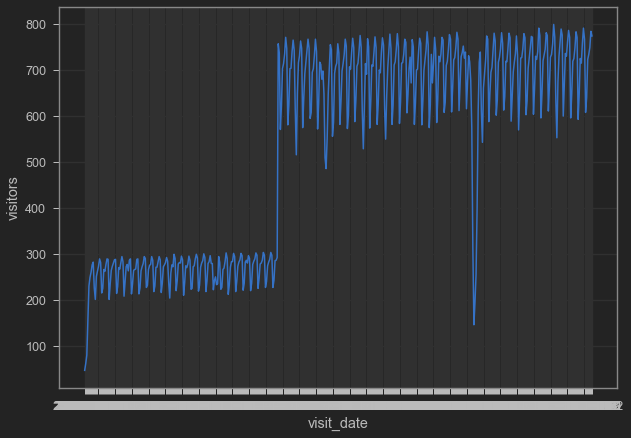

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
temp = train_data.groupby('visit_date').count().visitors
sns.lineplot(temp.index, temp)